In [13]:
import os
import numpy as np
import pandas as pd
from sktime.datasets import load_UCR_UEA_dataset
from sktime.datasets import tsc_dataset_names
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
tsc_dataset_names.multivariate

['ArticularyWordRecognition',
 'AsphaltObstaclesCoordinates',
 'AsphaltPavementTypeCoordinates',
 'AsphaltRegularityCoordinates',
 'AtrialFibrillation',
 'BasicMotions',
 'CharacterTrajectories',
 'Cricket',
 'DuckDuckGeese',
 'EigenWorms',
 'Epilepsy',
 'EthanolConcentration',
 'ERing',
 'FaceDetection',
 'FingerMovements',
 'HandMovementDirection',
 'Handwriting',
 'Heartbeat',
 'InsectWingbeat',
 'JapaneseVowels',
 'Libras',
 'LSST',
 'MotorImagery',
 'NATOPS',
 'PenDigits',
 'PEMS-SF',
 'PhonemeSpectra',
 'RacketSports',
 'SelfRegulationSCP1',
 'SelfRegulationSCP2',
 'SpokenArabicDigits',
 'StandWalkJump',
 'UWaveGestureLibrary']

In [15]:
dataset_handle = 'PenDigits'
dataset_name = 'pen_digits'
processed_dir = './../../processed/'
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
full_outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
test_key_outp_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')
train_outp_fname = os.path.join(output_dir, f'{dataset_name}_train.csv')
test_outp_fname = os.path.join(output_dir, f'{dataset_name}_test.csv')



## Load training data

In [16]:
X_train, y_train = load_UCR_UEA_dataset(name=dataset_handle, split='TRAIN')
X_test, y_test = load_UCR_UEA_dataset(name=dataset_handle, split='TEST')

In [17]:
def prepare_dataset(X, y):
    df = {}
    label_column = []
    for i, row in X.iterrows():
        label = y[i]
        for column in X.columns:
            series_values = row[column].tolist()
            if column in df:
                df[column].extend(series_values)
            else:
                df[column] = series_values
        label_column += [label] * len(series_values)

    df['label'] = label_column
    df = pd.DataFrame(df)
    df.insert(0, 'series_id', 0)
    timestep = list(range(len(df)))
    df.insert(1, 'timestep', timestep)

    return df

            


In [18]:
def plot_series(df, feature='dim_0'):
    # Determine unique categories and assign colors
    unique_categories = df['label'].unique()
    colors = sns.color_palette("Dark2", len(unique_categories))  # 'hsv' is just one option
    color_map = dict(zip(unique_categories, colors))

    # Map colors in DataFrame
    df['color'] = df['label'].map(color_map)

    plt.figure(figsize=(20,8))
    for i in range(len(df) - 1):
        plt.plot(df.index[i:i+2], df[feature].iloc[i:i+2], color=df['color'].iloc[i])


In [19]:
train_df = prepare_dataset(X_train, y_train)
test_df = prepare_dataset(X_test, y_test)
full = pd.concat([train_df, test_df])
test_key_df = test_df[['series_id', 'timestep', 'label']]

/var/folders/v2/zm88qd750pz1379tn2s194q00000gn/T/ipykernel_47873/4277273881.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['label'].map(color_map)


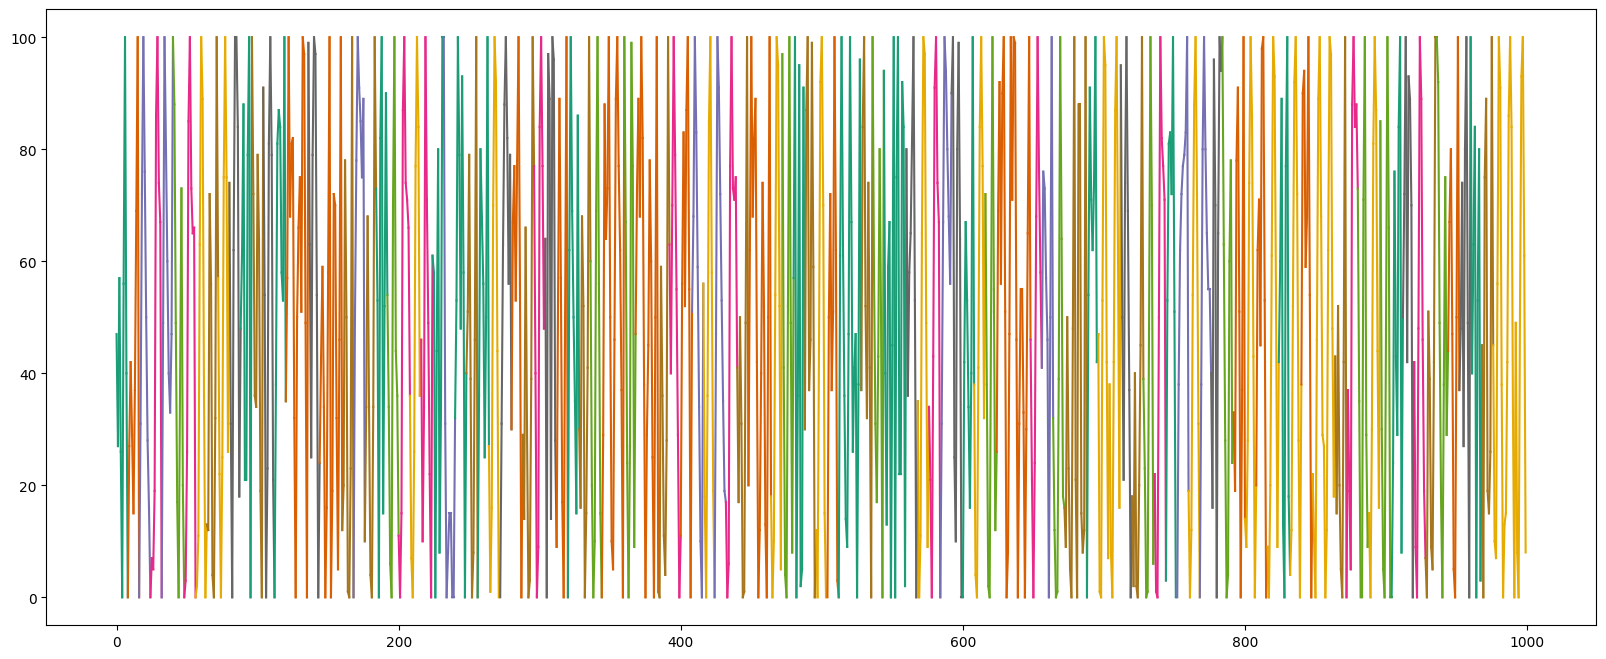

In [20]:
plot_series(train_df.iloc[0:1000])

/var/folders/v2/zm88qd750pz1379tn2s194q00000gn/T/ipykernel_47873/4277273881.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['label'].map(color_map)


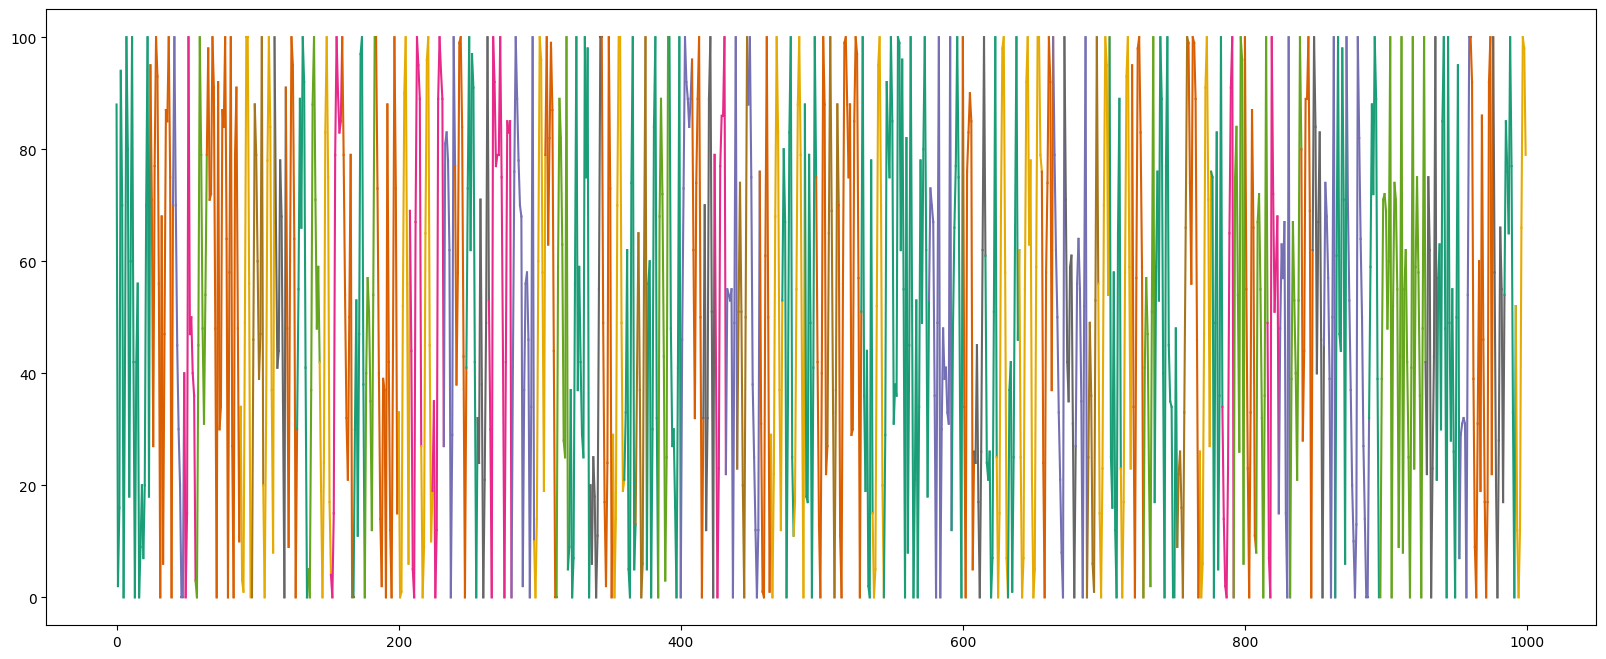

In [21]:
plot_series(test_df.iloc[0:1000])

In [22]:
test_df.drop(columns=['label'], inplace=True)
full.to_csv(full_outp_fname, index=False)
test_key_df.to_csv(test_key_outp_fname, index=False)
train_df.to_csv(train_outp_fname, index=False)
test_df.to_csv(test_outp_fname, index=False)